In [1]:
import sys
import os

# Get the path to src/ relative to this notebook
notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

# Add to Python path if not already there
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from utils.chelsa import extract_param
from datasource.chelsa import s3, layer, sampling

# Generate CHELSA cube

In [2]:
param_file = "prototype_param.yaml"
chelsa_month_param = extract_param.read_chelsa_month_param(param_file, param_path = "../../config")
chelsa_ref_period_param = extract_param.read_chelsa_clim_ref_period_param(param_file, param_path = "../../config")
chelsa_ref_month_param = extract_param.read_chelsa_clim_ref_month_param(param_file, param_path = "../../config")
chelsa_clim_period_param = extract_param.read_chelsa_clim_sim_period_param(param_file, param_path = "../../config")
chelsa_clim_month_param = extract_param.read_chelsa_clim_sim_month_param(param_file, param_path = "../../config")

In [3]:
def da_layer_constructor(data_layer_func, param):
    static_param = list(param.values())[1:]
    data_arrays = []
    for var in param["var"]:
        data_arrays.append(data_layer_func(var, *static_param))
    return data_arrays

In [4]:
test = da_layer_constructor(layer.chelsa_month_ts, chelsa_month_param)

-----Retrieving monthly CHELSA data for variable 'clt' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:14<00:00,  1.63item/s]


-----Retrieving monthly CHELSA data for variable 'cmi' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.49item/s]


-----Retrieving monthly CHELSA data for variable 'hurs' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.43item/s]


-----Retrieving monthly CHELSA data for variable 'pet' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.52item/s]


-----Retrieving monthly CHELSA data for variable 'pr' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42item/s]


-----Retrieving monthly CHELSA data for variable 'rsds' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39item/s]


-----Retrieving monthly CHELSA data for variable 'sfcWind' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39item/s]


-----Retrieving monthly CHELSA data for variable 'tas' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.50item/s]


-----Retrieving monthly CHELSA data for variable 'tasmax' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.48item/s]


-----Retrieving monthly CHELSA data for variable 'tasmin' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.39item/s]


-----Retrieving monthly CHELSA data for variable 'vpd' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.45item/s]


In [5]:
test

[('clt',
  <xarray.DataArray (time: 24, lat: 8, long: 23)>
  array([[[5152, 5154, 5162, ..., 5224, 5216, 5210],
          [5147, 5147, 5154, ..., 5206, 5217, 5215],
          [5152, 5150, 5145, ..., 5228, 5243, 5248],
          ...,
          [5162, 5153, 5149, ..., 5193, 5206, 5228],
          [5169, 5149, 5166, ..., 5204, 5224, 5280],
          [5168, 5155, 5162, ..., 5220, 5249, 5298]],
  
         [[6264, 6268, 6267, ..., 6225, 6220, 6203],
          [6239, 6247, 6256, ..., 6163, 6185, 6190],
          [6262, 6256, 6254, ..., 6232, 6251, 6260],
          ...,
          [6255, 6254, 6270, ..., 6205, 6230, 6297],
          [6232, 6250, 6288, ..., 6223, 6292, 6416],
          [6257, 6257, 6266, ..., 6278, 6371, 6461]],
  
         [[6139, 6139, 6142, ..., 6138, 6145, 6150],
          [6117, 6116, 6119, ..., 6123, 6140, 6145],
          [6109, 6102, 6099, ..., 6159, 6176, 6193],
          ...,
  ...
          ...,
          [5179, 5178, 5181, ..., 5036, 5039, 5054],
          [5177, 51

In [ ]:
import xarray

def regrid_interp(
    da: xr.DataArray,
    new_lats: xr.DataArray,
    new_lons: xr.DataArray,
    method: str = "linear"
) -> xr.DataArray:
    """
    Upscale or downscale by interpolating `da` onto (new_lats, new_lons).
    `method` can be "linear", "nearest", or "cubic".
    """
    # Ensure monotonic coords
    da = da.sortby(["lat", "lon"])
    return da.interp(lat=new_lats, lon=new_lons, method=method)

def reproject_array(data_array, upscaled_long, upscaled_lat, method="cubic"):
    

In [6]:
lower = test[0]
lower

('clt',
 <xarray.DataArray (time: 24, lat: 8, long: 23)>
 array([[[5152, 5154, 5162, ..., 5224, 5216, 5210],
         [5147, 5147, 5154, ..., 5206, 5217, 5215],
         [5152, 5150, 5145, ..., 5228, 5243, 5248],
         ...,
         [5162, 5153, 5149, ..., 5193, 5206, 5228],
         [5169, 5149, 5166, ..., 5204, 5224, 5280],
         [5168, 5155, 5162, ..., 5220, 5249, 5298]],
 
        [[6264, 6268, 6267, ..., 6225, 6220, 6203],
         [6239, 6247, 6256, ..., 6163, 6185, 6190],
         [6262, 6256, 6254, ..., 6232, 6251, 6260],
         ...,
         [6255, 6254, 6270, ..., 6205, 6230, 6297],
         [6232, 6250, 6288, ..., 6223, 6292, 6416],
         [6257, 6257, 6266, ..., 6278, 6371, 6461]],
 
        [[6139, 6139, 6142, ..., 6138, 6145, 6150],
         [6117, 6116, 6119, ..., 6123, 6140, 6145],
         [6109, 6102, 6099, ..., 6159, 6176, 6193],
         ...,
 ...
         ...,
         [5179, 5178, 5181, ..., 5036, 5039, 5054],
         [5177, 5179, 5191, ..., 5036, 5052,

In [10]:
test[1][1]["lat"].values

array([50.87374433, 50.865411  , 50.85707767, 50.84874433, 50.840411  ,
       50.83207767, 50.82374433, 50.815411  , 50.80707767, 50.79874433,
       50.790411  , 50.78207767, 50.77374433, 50.765411  , 50.75707767,
       50.74874433, 50.740411  , 50.73207767, 50.72374433, 50.715411  ,
       50.70707767, 50.69874433, 50.690411  ])

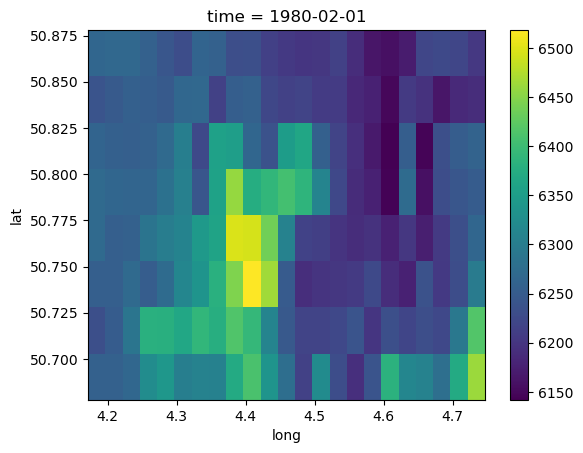

In [29]:
lower[1].sel(time="1980-02-01").plot()

In [65]:
us_test = lower[1].interp(lat=test[1][1]["lat"].values, long=test[1][1]["long"].values, method="linear")
us_filled = us_test.ffill(dim="lat").bfill(dim="lat").ffill(dim="long").bfill(dim="long")

In [73]:
us_test.sel(time="1980-02-01")[:2:]-us_filled.sel(time="1980-02-01")[:2:]

<xarray.DataArray (lat: 2, long: 69)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., nan, nan]])
Coordinates:
    time     datetime64[ns] 1980-02-01
  * lat      (lat) float64 50.87 50.87
  * long     (long) float64 4.176 4.184 4.192 4.201 ... 4.717 4.726 4.734 4.742

In [14]:
clt_data = test[0][1]
clt_data.lat.values

array([50.865411  , 50.84041102, 50.81541102, 50.79041103, 50.76541105,
       50.74041105, 50.71541106, 50.69041108])

In [15]:
clt_data.long.values

array([4.18387099, 4.20887098, 4.23387097, 4.25887096, 4.28387095,
       4.30887094, 4.33387093, 4.35887092, 4.38387091, 4.4088709 ,
       4.43387089, 4.45887088, 4.48387087, 4.50887086, 4.53387085,
       4.55887084, 4.58387083, 4.60887082, 4.63387081, 4.6588708 ,
       4.68387079, 4.70887078, 4.73387077])

In [16]:
test[1][1]["lat"].values

array([50.87374433, 50.865411  , 50.85707767, 50.84874433, 50.840411  ,
       50.83207767, 50.82374433, 50.815411  , 50.80707767, 50.79874433,
       50.790411  , 50.78207767, 50.77374433, 50.765411  , 50.75707767,
       50.74874433, 50.740411  , 50.73207767, 50.72374433, 50.715411  ,
       50.70707767, 50.69874433, 50.690411  ])

In [32]:
long_coordinates = [da[1].long.values for da in test]
long_coordinates_homo = [

[array([4.18387099, 4.20887098, 4.23387097, 4.25887096, 4.28387095,
        4.30887094, 4.33387093, 4.35887092, 4.38387091, 4.4088709 ,
        4.43387089, 4.45887088, 4.48387087, 4.50887086, 4.53387085,
        4.55887084, 4.58387083, 4.60887082, 4.63387081, 4.6588708 ,
        4.68387079, 4.70887078, 4.73387077]),
 array([4.17553767, 4.183871  , 4.19220433, 4.20053767, 4.208871  ,
        4.21720433, 4.22553767, 4.233871  , 4.24220433, 4.25053767,
        4.258871  , 4.26720433, 4.27553767, 4.283871  , 4.29220433,
        4.30053767, 4.308871  , 4.31720433, 4.32553767, 4.333871  ,
        4.34220433, 4.35053767, 4.358871  , 4.36720433, 4.37553767,
        4.383871  , 4.39220433, 4.40053767, 4.408871  , 4.41720433,
        4.42553767, 4.433871  , 4.44220433, 4.45053767, 4.458871  ,
        4.46720433, 4.47553767, 4.483871  , 4.49220433, 4.50053767,
        4.508871  , 4.51720433, 4.52553767, 4.533871  , 4.54220433,
        4.55053767, 4.558871  , 4.56720433, 4.57553767, 4.583871  ,
  

In [35]:
import numpy as np

def compare_coord_ticks(coord_ticks):
    ref = coord_ticks[0]
    differences = []  
    for i, arr in enumerate(coord_ticks):
        if len(arr) != len(ref):
            differences.append((i, "different length"))
        elif not np.array_equal(arr, ref):
            differences.append((i, "same length, different values")) 
    return differences

In [50]:
long_coordinates = [da[1].long.values for da in test]
lat_coordinates = [da[1].lat.values for da in test]

def group_by_size(coordinates):
    #Retrieve size of coordinates
    coordinates_sizes = [len(coordinate_array) for coordinate_array in coordinates]
    #Group coordinates that are similar in size together
    co_idx = [[idx for idx, el in enumerate(coordinates_sizes) if el==size] for size in list(set(coordinates_sizes))]
    return co_idx

def check_homogeneity(coordinates):
    if len(coordinates)==1:
        return True
    else:
        
group_by_size(lat_coordinates)

[[0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [36]:
compare_coord_ticks(long_coordinates)

[(1, 'different length'),
 (2, 'different length'),
 (3, 'different length'),
 (4, 'different length'),
 (5, 'different length'),
 (6, 'different length'),
 (7, 'different length'),
 (8, 'different length'),
 (9, 'different length'),
 (10, 'different length')]

In [91]:
def regrid_spatial_coordinates(data_array, target_lat, target_long,
                               harmonization="upscale", method="linear", fill_nearest=True):
        if harmonization=="upscale":
            upscaled_data_array = data_array.interp(lat=target_lat, long=target_long, method=method)
            if fill_nearest:
                upscaled_filled_data_array = upscaled_data_array.ffill(dim="lat").bfill(dim="lat").ffill(dim="long").bfill(dim="long")
                return upscaled_filled_data_array
            else:
                return upscaled_data_array
                
def da_concat(data_arrays, dim_name, coordinates):
        combined_data_array = xr.concat(data_arrays, dim=dim_name)
        combined_data_array = combined_data_array.assign_coords({dim_name: coordinates})
        return combined_data_array

In [94]:
import xarray as xr
r_da = regrid_spatial_coordinates(test[0][1], test[1][1].lat.values, test[1][1].long.values) 
r_var = test[0][0]
da = [tup[1] for tup in test[1:]]
da.insert(0, r_da)
names = [tup[0] for tup in test[1:]]
names.insert(0, r_var)
concat = da_concat(da, "variable", names)

In [95]:
concat

<xarray.DataArray (variable: 11, time: 24, lat: 23, long: 69)>
array([[[[5151.99999941, 5151.99999941, 5152.6666662 , ...,
          5211.99994806, 5211.99994806, 5211.99994806],
         [5151.99999941, 5151.99999941, 5152.6666662 , ...,
          5211.99994806, 5211.99994806, 5211.99994806],
         [5150.33333195, 5150.33333195, 5150.77777635, ...,
          5213.22218247, 5213.22218247, 5213.22218247],
         ...,
         [5168.66666046, 5168.66666046, 5162.77777556, ...,
          5268.11163722, 5268.11163722, 5268.11163722],
         [5168.33332746, 5168.33332746, 5163.22222095, ...,
          5274.8893972 , 5274.8893972 , 5274.8893972 ],
         [5168.33332746, 5168.33332746, 5163.22222095, ...,
          5274.8893972 , 5274.8893972 , 5274.8893972 ]],

        [[6263.99999584, 6263.99999584, 6265.33332997, ...,
          6208.66651341, 6208.66651341, 6208.66651341],
         [6263.99999584, 6263.99999584, 6265.33332997, ...,
          6208.66651341, 6208.66651341, 6208.66651341],
         [6255.66665947, 6255.66665947, 6257.44443839, ...,
          6201.88879732, 6201.88879732, 6201.88879732],
...
         [3390.        , 3425.        , 3434.        , ...,
          3202.        , 3157.        , 3136.        ],
         [3432.        , 3435.        , 3473.        , ...,
          3186.        , 3146.        , 3128.        ],
         [3464.        , 3472.        , 3471.        , ...,
          3180.        , 3137.        , 3117.        ]],

        [[2135.        , 2132.        , 2130.        , ...,
          2087.        , 2085.        , 2065.        ],
         [2118.        , 2134.        , 2117.        , ...,
          2097.        , 2097.        , 2080.        ],
         [2113.        , 2114.        , 2112.        , ...,
          2071.        , 2070.        , 2071.        ],
         ...,
         [2097.        , 2100.        , 2103.        , ...,
          1990.        , 1981.        , 1959.        ],
         [2104.        , 2105.        , 2125.        , ...,
          1983.        , 1975.        , 1953.        ],
         [2123.        , 2127.        , 2127.        , ...,
          1976.        , 1969.        , 1947.        ]]]])
Coordinates:
  * time      (time) datetime64[ns] 1980-01-01 1980-02-01 ... 1981-12-01
  * lat       (lat) float64 50.87 50.87 50.86 50.85 ... 50.72 50.71 50.7 50.69
  * long      (long) float64 4.176 4.184 4.192 4.201 ... 4.717 4.726 4.734 4.742
  * variable  (variable) <U7 'clt' 'cmi' 'hurs' ... 'tasmax' 'tasmin' 'vpd'

In [ ]:
def harmonize_data_arrays(data_arrays, 
                          harmonization="upscale", method="linear", fill_na=True):
    if harmonization=="upscale":
        long_coordinates = [da.long.values for da in data_arrays]
        latitude_coordinates = [da.lat.values for da in data_arrays]
        target_long = 
        target_lat

In [96]:
class spatiotemporal_cube():
    def __init__(self):
        pass

    def da_layer_constructor(self, data_layer_func, param):
        static_param = list(param.values())[1:]
        data_arrays = []
        for var in param["var"]:
            data_arrays.append(data_layer_func(var, *static_param))
        return data_arrays

    def da_concat(self, data_arrays, dim_name, coordinates):
        combined_data_array = xr.concat(data_arrays, dim=dim_name)
        combined_data_array = combined_data_array.assign_coords({dim_name: coordinates})
        return combined_data_array
        
    def regrid_spatial_coordinates(self, data_array, target_lat, target_long,
                                   harmonization="upscale", method="linear", fill_nearest=True):
        if harmonization=="upscale":
            upscaled_data_array = data_array.interp(lat=target_lat, long=target_long, method=method)
            if fill_nearest:
                upscaled_filled_data_array = upscaled_data_array.ffill(dim="lat").bfill(dim="lat").ffill(dim="long").bfill(dim="long")
                return upscaled_filled_data_array
            else:
                return upscaled_data_array

In [75]:
test_st_cube = spatiotemporal_cube()

In [115]:
class chelsa_cube(spatiotemporal_cube):
    def __init__(self):
        self.layers = ["chelsa_month", 
                       "chelsa_clim_ref_period",
                       "chelsa_clim_ref_month",
                       "chelsa_clim_sim_period",
                       "chelsa_clim_sim_month"]
        self.data = []

    #generate monthly data for a set of variables
    def generate_chelsa_month_layer(self, param_file, param_path = "../../config"):
        chelsa_month_param = extract_param.read_chelsa_month_param(param_file, param_path = param_path)
        var_names, data = zip(*da_layer_constructor(layer.chelsa_month_ts, chelsa_month_param)) #returns list of tuples (var_name, data)
        #Current assumption is that all variables will be requested
        #In future general harmonization functions will be implemented 
        #Select the coordinates from the second variable, clt is the only one that differs
        target_lat = data[1].lat.values
        target_long = data[1].long.values
        upscaled_clt = self.regrid_spatial_coordinates(data[0], target_lat, target_long)
        data = [upscaled_clt]+list(data[1:])
        return self.da_concat(data, "variable", list(var_names))

In [116]:
test_chelsa_cube = chelsa_cube()

In [117]:
test_layer = test_chelsa_cube.generate_chelsa_month_layer("prototype_param.yaml")

-----Retrieving monthly CHELSA data for variable 'clt' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.86item/s]


-----Retrieving monthly CHELSA data for variable 'cmi' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.98item/s]


-----Retrieving monthly CHELSA data for variable 'hurs' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.79item/s]


-----Retrieving monthly CHELSA data for variable 'pet' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.03item/s]


-----Retrieving monthly CHELSA data for variable 'pr' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.12item/s]


-----Retrieving monthly CHELSA data for variable 'rsds' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.16item/s]


-----Retrieving monthly CHELSA data for variable 'sfcWind' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.51item/s]


-----Retrieving monthly CHELSA data for variable 'tas' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.31item/s]


-----Retrieving monthly CHELSA data for variable 'tasmax' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.98item/s]


-----Retrieving monthly CHELSA data for variable 'tasmin' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.49item/s]


-----Retrieving monthly CHELSA data for variable 'vpd' within bbox (4.171371, 50.68406, 4.743004, 50.877911)-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.37item/s]


In [118]:
test_layer

<xarray.DataArray (variable: 11, time: 12, lat: 23, long: 69)>
array([[[[5151.99999941, 5151.99999941, 5152.6666662 , ...,
          5211.99994806, 5211.99994806, 5211.99994806],
         [5151.99999941, 5151.99999941, 5152.6666662 , ...,
          5211.99994806, 5211.99994806, 5211.99994806],
         [5150.33333195, 5150.33333195, 5150.77777635, ...,
          5213.22218247, 5213.22218247, 5213.22218247],
         ...,
         [5168.66666046, 5168.66666046, 5162.77777556, ...,
          5268.11163722, 5268.11163722, 5268.11163722],
         [5168.33332746, 5168.33332746, 5163.22222095, ...,
          5274.8893972 , 5274.8893972 , 5274.8893972 ],
         [5168.33332746, 5168.33332746, 5163.22222095, ...,
          5274.8893972 , 5274.8893972 , 5274.8893972 ]],

        [[6263.99999584, 6263.99999584, 6265.33332997, ...,
          6208.66651341, 6208.66651341, 6208.66651341],
         [6263.99999584, 6263.99999584, 6265.33332997, ...,
          6208.66651341, 6208.66651341, 6208.66651341],
         [6255.66665947, 6255.66665947, 6257.44443839, ...,
          6201.88879732, 6201.88879732, 6201.88879732],
...
         [2857.        , 2865.        , 2872.        , ...,
          2763.        , 2748.        , 2716.        ],
         [2872.        , 2875.        , 2906.        , ...,
          2752.        , 2742.        , 2712.        ],
         [2903.        , 2910.        , 2910.        , ...,
          2751.        , 2737.        , 2704.        ]],

        [[2304.        , 2303.        , 2299.        , ...,
          2286.        , 2269.        , 2267.        ],
         [2306.        , 2304.        , 2286.        , ...,
          2274.        , 2270.        , 2266.        ],
         [2280.        , 2280.        , 2280.        , ...,
          2246.        , 2242.        , 2238.        ],
         ...,
         [2202.        , 2216.        , 2215.        , ...,
          2108.        , 2099.        , 2088.        ],
         [2211.        , 2214.        , 2226.        , ...,
          2099.        , 2090.        , 2080.        ],
         [2206.        , 2222.        , 2209.        , ...,
          2085.        , 2079.        , 2072.        ]]]])
Coordinates:
  * time      (time) datetime64[ns] 1980-01-01 1980-02-01 ... 1980-12-01
  * lat       (lat) float64 50.87 50.87 50.86 50.85 ... 50.72 50.71 50.7 50.69
  * long      (long) float64 4.176 4.184 4.192 4.201 ... 4.717 4.726 4.734 4.742
  * variable  (variable) <U7 'clt' 'cmi' 'hurs' ... 'tasmax' 'tasmin' 'vpd'